In [1]:
import os
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/mahahussain/Desktop/UK-Road-Accident-Analysis/UK-Road-Accident-Analysis'

In [4]:
# Import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [5]:
# Load the data 
file_path = "filtered_accident_data_set.csv"  # file path 
df = pd.read_csv(file_path) 

# Display basic structure 
print("Dataset Shape:", df.shape)  
print("First few rows:\n", df.head()) 

Dataset Shape: (31494, 13)
First few rows:
            Index Accident_Severity Accident Date   Latitude  \
0  200720D003001            Slight    02-01-2019  52.513668   
1  200720D003101            Slight    02-01-2019  52.502396   
2  200720D003802           Serious    03-01-2019  52.563201   
3  200720D005801            Slight    02-01-2019  52.493431   
4  200720D005901            Slight    05-01-2019  52.510805   

        Light_Conditions District Area  Longitude  Number_of_Casualties  \
0  Darkness - lights lit    Birmingham  -1.901975                     1   
1               Daylight    Birmingham  -1.867086                     1   
2               Daylight    Birmingham  -1.822793                     1   
3               Daylight    Birmingham  -1.818507                     1   
4  Darkness - lights lit    Birmingham  -1.834202                     1   

   Number_of_Vehicles Road_Surface_Conditions           Road_Type  \
0                   2             Wet or damp    Dual car

## Road Conditions and Accident Severity

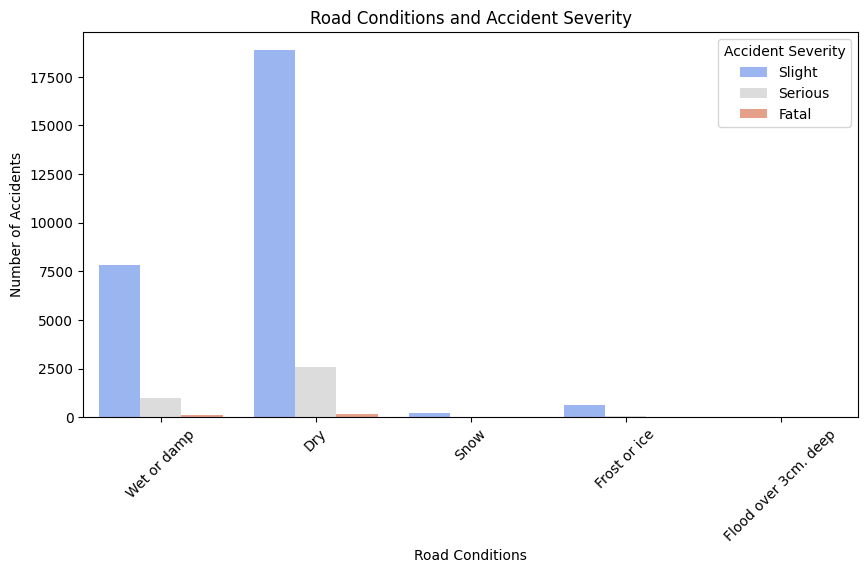

In [6]:
# Plot
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Road_Surface_Conditions", hue="Accident_Severity", palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Road Conditions and Accident Severity")
plt.xlabel("Road Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Accident Severity Distribution

In [7]:
# Define accident severity counts 

accident_severity_counts = df["Accident_Severity"].value_counts().reset_index()
accident_severity_counts.columns = ["Accident_Severity", "Count"]

# Create a pie chart
fig = px.pie(accident_severity_counts, 
             names="Accident_Severity", 
             values="Count", 
             title="Accident Severity Distribution", 
             labels={"Accident_Severity": "Severity", "Count": "Number of Accidents"})

# Show the pie chart
fig.show()


 Light Conditions and Accidents

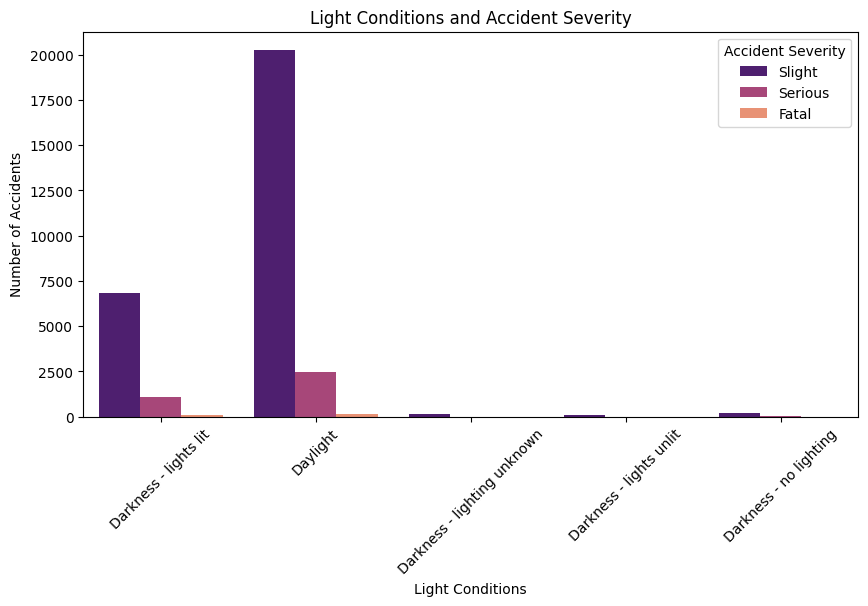

In [8]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="Light_Conditions", hue="Accident_Severity", palette="magma")
plt.xticks(rotation=45)
plt.title("Light Conditions and Accident Severity")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Road Type and Number of Casualties

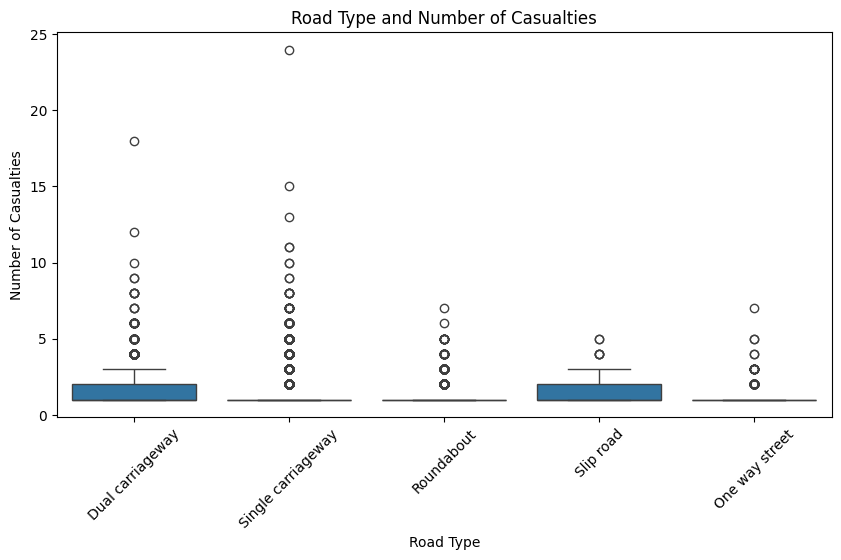

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="Road_Type", y="Number_of_Casualties")
plt.xticks(rotation=45)
plt.title("Road Type and Number of Casualties")
plt.xlabel("Road Type")
plt.ylabel("Number of Casualties")
plt.show()


Accident Frequency in Urban and Rural Areas

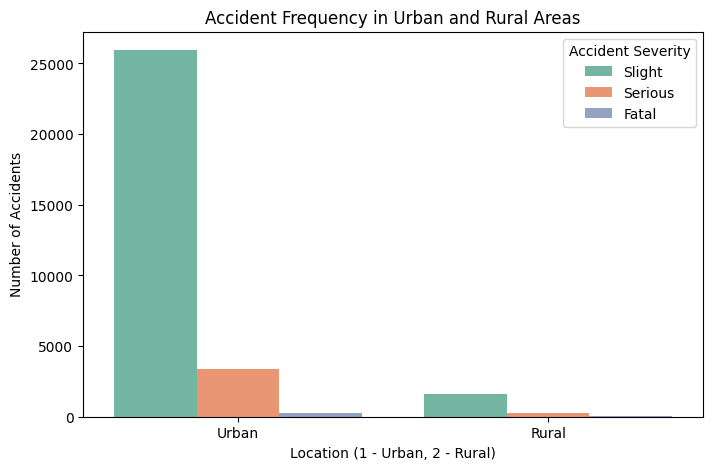

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Urban_or_Rural_Area", hue="Accident_Severity", palette="Set2")
plt.title("Accident Frequency in Urban and Rural Areas")
plt.xlabel("Location (1 - Urban, 2 - Rural)")
plt.ylabel("Number of Accidents")
plt.legend(title="Accident Severity")
plt.show()


Number of Vehicles vs Number of Casualties

In [11]:
fig = px.scatter(df, 
                 x="Number_of_Vehicles", 
                 y="Number_of_Casualties", 
                 title="Number of Vehicles vs Number of Casualties")
fig.show()


Number of Casualties by Accident Severity

In [12]:
fig = px.box(df, 
             x="Accident_Severity", 
             y="Number_of_Casualties", 
             title="Number of Casualties by Accident Severity")
fig.show()
